In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fem.polynomial_chaos import read_eigendata

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
def readz_eigendata(filename):
    """
    Given a filename, read in the CSV data from Matlab and reconstruct
    the interpolated functions that are used by chebfun
    """
    
    # Read and parse the CSV file
    with open(filename) as f:
        reader = csv.reader(f)
        rows = [row for row in reader]
        
    # The eigenvalues are given by the first row of data
    eigenvalues = [float(l) for l in rows[0]]
    
    data = list()
    
    # For each eigenvalue
    for i in range(len(eigenvalues)):
        
        # Reconstruct the interpolation used by chebfun
        p = BarycentricInterpolator([float(x) for x in rows[2*i+1]],
                                    [float(y) for y in rows[2*i+2]])
        
        data.append({'lambda': eigenvalues[i],
                     'beta': p})
        
    # Reverse the order so we have largest eigenvalue first
    data.reverse()

    return data 

In [2]:
data = read_eigendata('expansion-data.csv')

/home/alex/Programming/uni/polynomail_chaos/src/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


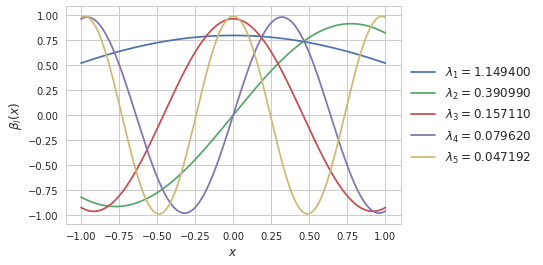

In [8]:
xs = np.linspace(-1,1,512)

fig, ax = plt.subplots(1)
index = 1

for eig in data:
    ys = [eig['beta'](x) for x in xs]
    ax.plot(xs, ys, label=r'$\lambda_%i = %f$' % (index, eig['lambda']))
    ax.set_xlabel(r'$x$', fontsize=12)
    ax.set_ylabel(r'$\beta_l(x)$', fontsize=12)
    legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    
    index += 1
    
fig.savefig('kle-eigenfunctions.pdf', bbox_extra_artists=[legend], bbox_inches='tight')